In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/GlobalLandTemperaturesByCity/GlobalLandTemperaturesByCity.csv")

In [3]:
df.shape

(8599212, 7)

In [4]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
len(df.Country.unique())

159

In [7]:
df = df.drop(columns=["AverageTemperatureUncertainty"])

In [8]:
df.head()

,dt,AverageTemperature,City,Country,Latitude,Longitude
0,1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,Århus,Denmark,57.05N,10.33E


In [9]:
df_India = df[df.Country == "India"]

In [10]:
del df

In [11]:
df_India.shape

(1014906, 6)

In [12]:
df_India.head()

,dt,AverageTemperature,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,Abohar,India,29.74N,73.85E


In [13]:
df_India.describe()

,AverageTemperature
count,960548.000000
mean,25.429224
std,5.130301
min,-5.045000
25%,22.484000
50%,26.314000
75%,29.037000
max,37.522000


In [14]:
len(df_India.City.unique())

391

In [15]:
df_India.dtypes

dt                     object
AverageTemperature    float64
City                   object
Country                object
Latitude               object
Longitude              object
dtype: object

In [16]:
df_India.groupby("City").mean().max()

AverageTemperature    28.417858
dtype: float64

In [17]:
df_India.groupby("City").mean()["AverageTemperature"].argmax()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'Alandur'

In [18]:
df_India.loc[df_India.AverageTemperature == df_India.AverageTemperature.max(), :]

,dt,AverageTemperature,City,Country,Latitude,Longitude
949994,1995-06-01,37.522,Bikaner,India,28.13N,73.64E


In [19]:
df_India.dt = pd.to_datetime(df_India.dt)

In [20]:
df_India.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
City                          object
Country                       object
Latitude                      object
Longitude                     object
dtype: object

In [21]:
df_India.loc[df_India.AverageTemperature.idxmax()]

dt                    1995-06-01 00:00:00
AverageTemperature                 37.522
City                              Bikaner
Country                             India
Latitude                           28.13N
Longitude                          73.64E
Name: 949994, dtype: object

In [22]:
df_India.loc[df_India.AverageTemperature.idxmin()]

dt                    1905-02-01 00:00:00
AverageTemperature                 -5.045
City                             Srinagar
Country                             India
Latitude                           34.56N
Longitude                          73.95E
Name: 7154223, dtype: object

In [23]:
df_India_Bikaner = df_India.loc[df_India.City == "Bikaner", :]

In [24]:
df_India_Bikaner.shape

(2613, 6)

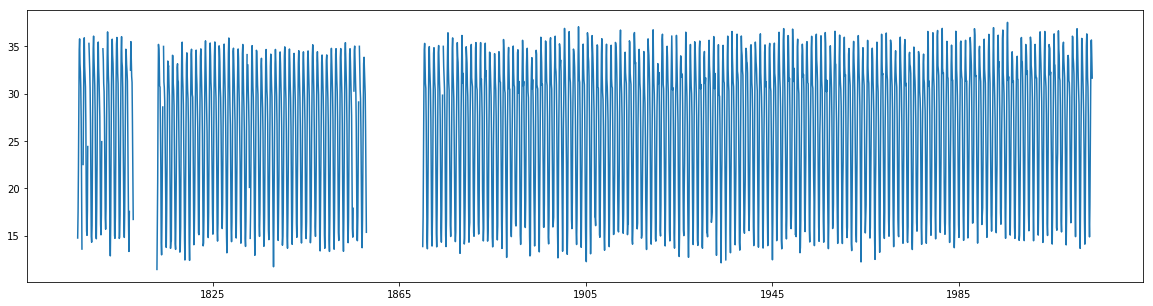

In [25]:
plt.subplots(figsize=(20,5))
plt.plot(df_India_Bikaner.dt, df_India_Bikaner.AverageTemperature)

In [26]:
df_India.head()

,dt,AverageTemperature,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,Abohar,India,29.74N,73.85E


In [27]:
df_India.drop(columns=["Country", "Latitude", "Longitude"], inplace=True)

In [28]:
df_India.head()

,dt,AverageTemperature,City
49880,1816-03-01,19.934,Abohar
49881,1816-04-01,26.641,Abohar
49882,1816-05-01,32.535,Abohar
49883,1816-06-01,33.254,Abohar
49884,1816-07-01,31.105,Abohar


### Augmented Dickey-Fuller

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def plot_rolling_mean(df):
    # Determing rolling statistics
    roll_mean = pd.rolling_mean(df, window=12)
    # Plot rolling statistics:
    plt.plot(df, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

In [31]:
def stationarity_check(df):
    # Determing rolling statistics
    roll_mean = pd.rolling_mean(df, window=12)
    # Plot rolling statistics:
    plt.plot(df, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
#     # Perform Augmented Dickey-Fuller test:
#     print('Augmented Dickey-Fuller test:')
#     df_test = adfuller(ts)
#     print("type of df_test: ",type(df_test))
#     print("df_test: ",df_test)
#     df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     print("df_output: \n",df_output)
#     for key,value in df_test[4].items():
#         df_output['Critical Value (%s)'%key] = value
#     print(df_output)

In [32]:
df_India_Bikaner = df_India_Bikaner.set_index("dt")

In [33]:
roll_mean = df_India_Bikaner.AverageTemperature.rolling(12).mean()

In [34]:
roll_mean[130:135]

dt
1806-11-01    26.218083
1806-12-01    26.188750
1807-01-01    26.065417
1807-02-01    26.072250
1807-03-01          NaN
Name: AverageTemperature, dtype: float64

In [35]:
roll_mean.shape

(2613,)

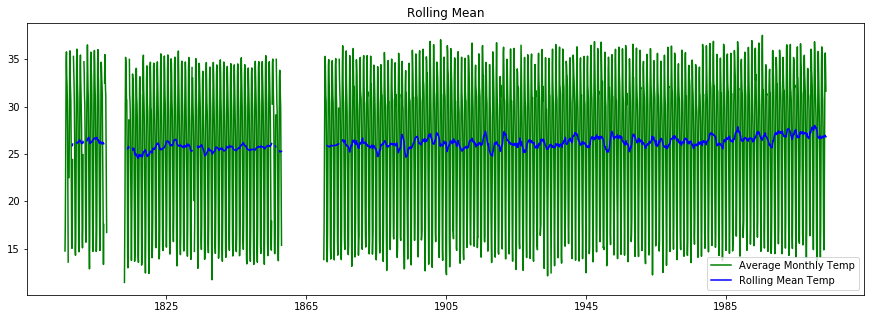

In [36]:
plt.subplots(figsize=(15,5))
plt.plot(df_India_Bikaner.AverageTemperature, color="green", label="Average Monthly Temp")
plt.plot(roll_mean, color="blue", label="Rolling Mean Temp")

plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

In [37]:
df_India_diff = df_India.groupby("City").max()["AverageTemperature"] - df_India.groupby("City").min()["AverageTemperature"]

In [38]:
df_India_diff.max()
#26.853 - Abohar

26.853

In [39]:
df_India_diff.idxmin()

'Port Blair'

In [40]:
df_India_diff.idxmax()

'Abohar'

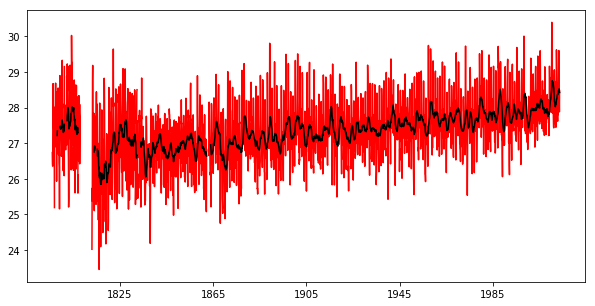

In [41]:
plt.subplots(figsize=(10, 5))
plt.plot(df_India.loc[df_India.City == "Port Blair", "dt"],
        df_India.loc[df_India.City == "Port Blair", "AverageTemperature"],
        color="red")



plt.plot(df_India.loc[df_India.City == "Port Blair", "dt"],
        df_India.loc[df_India.City == "Port Blair", "AverageTemperature"].rolling(12).mean(),
        color="black")

In [51]:
df_India.head()

,dt,AverageTemperature,City
49880,1816-03-01,19.934,Abohar
49881,1816-04-01,26.641,Abohar
49882,1816-05-01,32.535,Abohar
49883,1816-06-01,33.254,Abohar
49884,1816-07-01,31.105,Abohar


In [60]:
df_India["dt_month"] = df_India.dt.apply(lambda x: x.month)

In [61]:
df_India.head()

,dt,AverageTemperature,City,dt_month
49880,1816-03-01,19.934,Abohar,3
49881,1816-04-01,26.641,Abohar,4
49882,1816-05-01,32.535,Abohar,5
49883,1816-06-01,33.254,Abohar,6
49884,1816-07-01,31.105,Abohar,7


In [71]:
df_India.groupby("dt_month")["AverageTemperature"].mean()

dt_month
1     18.475209
2     20.917148
3     25.359971
4     29.123141
5     31.231778
6     30.382639
7     28.293731
8     27.550171
9     27.289276
10    25.580898
11    22.137286
12    18.878279
Name: AverageTemperature, dtype: float64

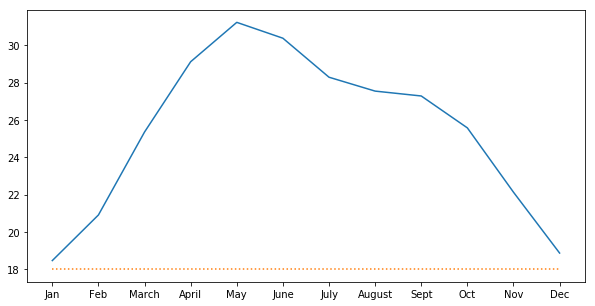

In [113]:
plt.subplots(figsize=(10,5))
plt.plot(df_India.groupby("dt_month")["AverageTemperature"].mean())
plt.plot(np.arange(1, 13), np.ones(12) + 17, linestyle=":")
plt.xticks(np.arange(1, 13), ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sept", "Oct", "Nov", "Dec"])
plt.show()

<Figure size 432x288 with 0 Axes>

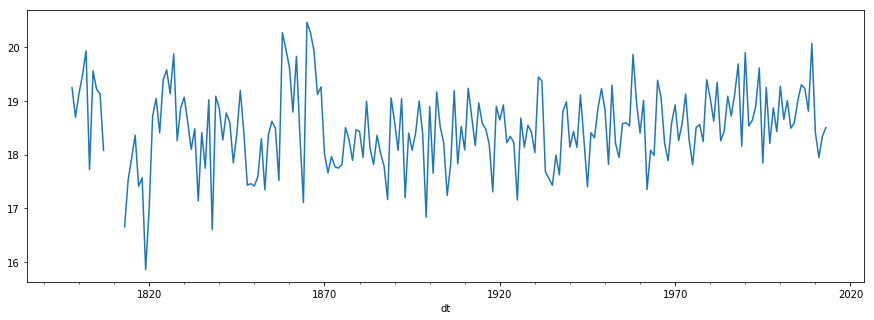

In [181]:
plt.clf()
plt.subplots(figsize=(15, 5))

df_India.loc[df_India.dt_month == 1].groupby("dt")["AverageTemperature"].mean().plot()
plt.show()

In [184]:
x = df_India.loc[df_India.dt_month == 1].groupby("dt")["AverageTemperature"].mean().reset_index()["dt"]
y = df_India.loc[df_India.dt_month == 1].groupby("dt")["AverageTemperature"].mean().reset_index()["AverageTemperature"]

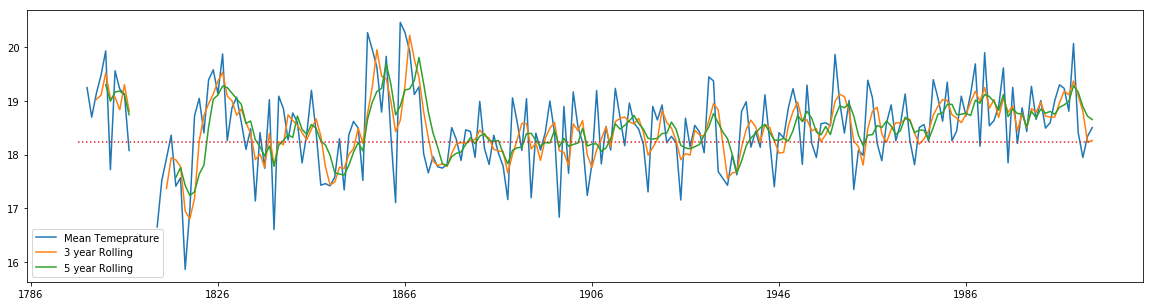

In [197]:
plt.subplots(figsize=(20,5))
plt.plot(x,y, label="Mean Temeprature")
plt.plot(x, y.rolling(3).mean(), label="3 year Rolling")
plt.plot(x, y.rolling(5).mean(), label="5 year Rolling")
plt.plot(x, [18.24]*len(x), linestyle=":")
plt.legend()